<a href="https://colab.research.google.com/github/ykitaguchi77/ImageProcessing/blob/master/PDF2TIFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PDFファイルをTIFFに変換するスクリプト**

## 特徴

- 仕上がりの画像サイズを先に確認しておくことにより、変換時の無駄な拡大・縮小を不要にしています

-  それにより、変換時の画像の劣化を最小限としています。

-  複数枚の画像を同時に変換することが可能です。


#**手順**

- 実行ボタンを押して順次進めていきます

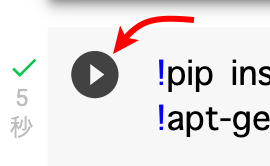



In [ ]:
!pip install pdf2image
!apt-get install poppler-utils

from pdf2image import convert_from_path
import tempfile
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import os
import shutil
import glob
import sys

def PDF2TIFF(pdf_path, dst_path, dpi):
    with tempfile.TemporaryDirectory() as path:
        images = convert_from_path(pdf_path, output_folder= path)
        orig = images[0]

        orig.save(dst_path, dpi = (dpi, dpi)) # 新しいDPIに書き換えて出力する
        orig.close() # 閉じる


def confirm_img_size(pdf_path, dpi):
    with tempfile.TemporaryDirectory() as path:
        images = convert_from_path(pdf_path, output_folder= path)
        
        orig = images[0]
        print(f"横: {orig.size[0]} px, 縦: {orig.size[1]} px")
        print(f"解像度： {dpi} dpi")
        print(f"横： {orig.size[0]*25.4/dpi :.2f} mm")
        print(f"縦： {orig.size[1]*25.4/dpi :.2f} mm")

        #imageを表示
        arrPIL = np.asarray(orig)
        plt.imshow(arrPIL)
        plt.show()
        orig.close() # 閉じる
        print("")

#**① PDF画像をアップロード**

実行を押して、pdfファイルを選択して下さい。

左フォルダのcontent配下に画像がアップロードされます。

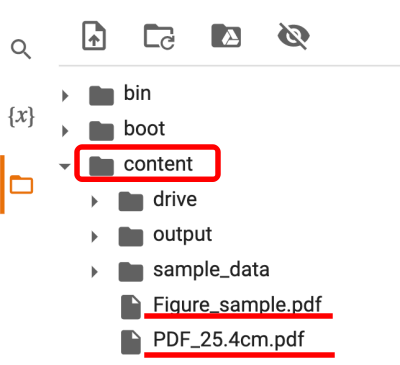

In [ ]:
#画像をアップロード
from google.colab import files
uploaded_file = files.upload()

pdf_name = next(iter(uploaded_file))
print(pdf_name)

#**② 解像度設定**

論文で指定されているdpiを選択しましょう。科学論文だと300dpiとなっていることが多いです。

（もし300pixで提出して受理されなければ、350pixぐらいに増やして変換しましょう。）

In [56]:
dpi = 300 #@param {type:"integer"}

print(f"dpi: {dpi} ")



dpi: 300 


#**③ 変換後画像のサイズを確認**

画像の横幅と縦幅が、論文の制約を満たしているかどうかを確認しましょう。

パワーポイントでデフォルトで設定されている画像幅（25.4cm)だと、300dpiで変換した後の画像幅は16.9cmとなり、科学論文ではちょうどぐらいになると思います。

想定より大きすぎる、あるいは小さすぎる場合には、パワーポイントでスライドのサイズを変更し（デザイン>スライドのサイズ>ページ設定から変更できます）、pdfを出力し直して下さい。


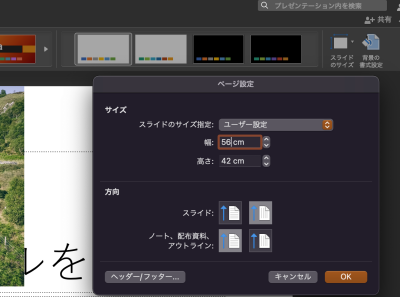

In [ ]:
#Contentsフォルダ内のPDFファイルをリスト化する
pdf_list = []
pdf_list = [os.path.join("/content", file) for file in os.listdir("/content") if file.endswith(".pdf")]
if pdf_list == []:
    print("PDFファイルをアップロードして下さい。")
    sys.exit()

#画像情報とプレビューを表示
for pdf_path in pdf_list:
    print(pdf_path)
    confirm_img_size(pdf_path, dpi)


#**④ Convert PDF to TIFF**

PDFファイルをTIFFに変換します。

変換されたファイルはoutputフォルダ内に保存されます。

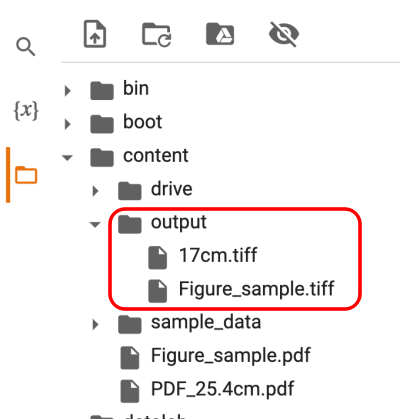

In [ ]:
#Contentsフォルダ内のPDFファイルをリスト化する
pdf_list = []
pdf_list = [os.path.join("/content", file) for file in os.listdir("/content") if file.endswith(".pdf")]
print(pdf_list)

#outputフォルダの作成
dst_folder = "/content/output"
if os.path.exists(dst_folder):
    shutil.rmtree(dst_folder)
os.makedirs(dst_folder)

for pdf_path in pdf_list:
    dst_path = os.path.join(dst_folder, os.path.splitext(os.path.basename(pdf_path))[0]+".tiff")
    print(dst_path)
    PDF2TIFF(pdf_path, dst_path, dpi)

print("Convert done!!")

#**⑤ Download TIFF files**

Outputフォルダ内のファイルがダウンロードされます。

In [ ]:
from google.colab import files

for file in glob.glob(dst_folder+"/*"):
    print(file)
    files.download(file) 